We will be working with a small audio file. It is an excerpt of a whale song made available by the [Alaska Whale Foundation](https://www.alaskawhalefoundation.org/). Do check out their website to learn more and for breathtaking imagery!

In [1]:
[x, sr] = audioread('data/whale_singing_excerpt.wav');

The audio file is around 5.2 seconds long, sampled at 16kHz. 

audioread returns the sampled data as an array (with values normalized to between -1 and 1), along with the sampling rate.

In [2]:
size(x)


ans =

       84212           1



In [3]:
sr


sr =

       16000



We can listen to the audio sample straight from our browser!

In [4]:
sound(x, sr)

Let's plot the first 100 sampled values.

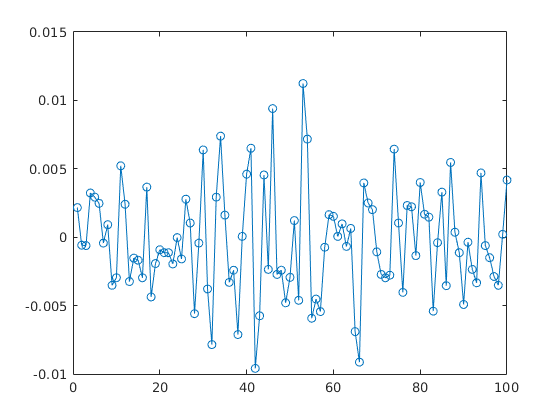

In [5]:
plot(x(1:100, :), '-o')

Let's take the first 2 seconds of audio.

In [6]:
first_2_secs = x(1:2*sr);

and plot a conventional (linear-frequency) spectogram.

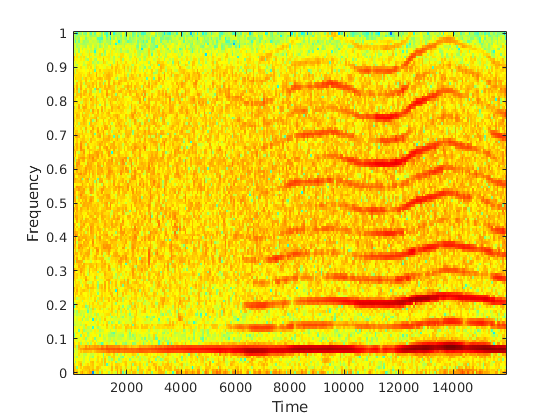

In [7]:
specgram(first_2_secs)

For comparisons sake, this is what a log-frequency spectogram would look like (plotted using function defined in logfsgram.m).

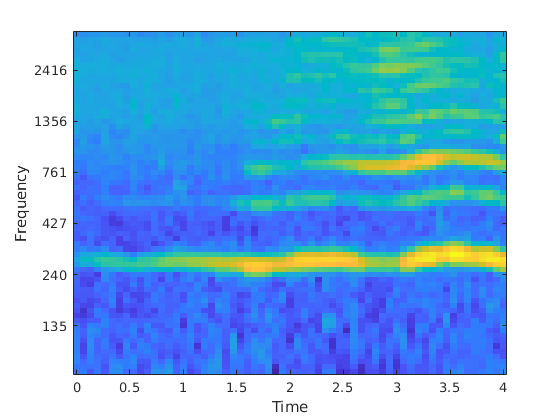

In [8]:
logfsgram(first_2_secs)

Let's now perform the linear reassignment as defined in reassignmentgw.m and take a look at the results.

In [9]:
x = first_2_secs; % signal in a format as returnd by audioread (sampled values normalized to between -1 and 1)
q = 0.5;          % I don't understand what q is, will try to read up on what this might be
tdeci = 100;      % width of windows to group the data into along the time axis,
                  %   a higher value will produce a narrower image
over = 2;         % number of frequencies tried per vertical pixel - a hyperparam impacting the quality of the
                  %   output, higher value == better quality but longer run time
noct = 40;        % seems to be a parameter controlling how granular we go, higher value increases resolution
                  %   at the cost of increased run time
minf = 0.1;       % I do not understand what these values are, my guess is that these are the min and max frequency
maxf = 1;         %   we want to include in the histogram? what scale is it though? seems neither 0 nor negative
                  %   values are accepted, I suspect this might be used in the context of output from fft

In [10]:
hist_data = reassignmentgw(x, q, tdeci, over, noct, minf, maxf);

done_reassignment in 0.95752 s


In [11]:
min(hist_data)


ans =

   All zero sparse: 1x134



In [12]:
max(hist_data, [], 'all')


ans =

   (1,1)       0.1131



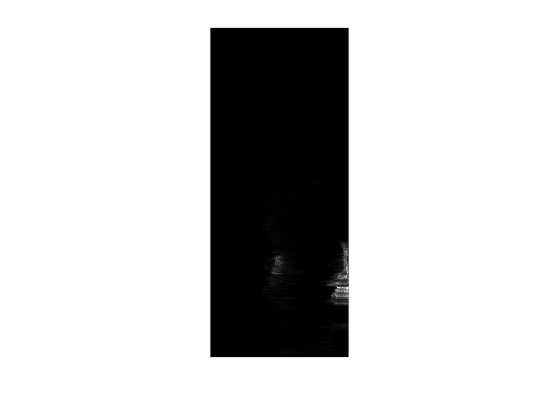

In [13]:
% as I understand, time is on the y axis in this plot
% TODO: add axis labels / ticks

imshow(full(hist_data), [0, max(full(hist_data), [], 'all')])